In [51]:
import pandas as pd
import numpy as np
np.random.seed(0)

In [52]:
# import a heart disease data 

In [53]:
heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [54]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [56]:
# Split the data into X features and Y labels 
X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

In [57]:
# choose a model 
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
# Split into train and test and fit a model 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# fit a model 

clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
clf.score(X_train, Y_train)

1.0

In [60]:
clf.score(X_test, Y_test)

0.8524590163934426

### SO WE CREATED A MODEL WITH A DATA SET ALL NUMERICAL VALUE AND WITHOUT MISSING VALUES

# Choose another data set having missing values and contain non numeric values 

* Fill missing values 
* Convert all columns to numeric

In [61]:
car_sales = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [62]:
len(car_sales)

1000

In [63]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [64]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [65]:
# fill missing values with imputing method 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
num_imputer = SimpleImputer(strategy = "mean")
doors_imputer = SimpleImputer(strategy = "constant", fill_value = 4.0)

cat_features = ["Make", "Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)])

filled_X = transformer.fit_transform(car_sales)

In [66]:
filled_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [67]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make","Colour","Odometer (KM)","Doors"])

In [68]:
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,missing,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [69]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [70]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [71]:
# convert to numeric 

car_sales_filled["Odometer (KM)"] = car_sales_filled["Odometer (KM)"].astype(int)

In [72]:
car_sales_filled["Odometer (KM)"].dtypes

dtype('int32')

In [73]:
car_sales_filled["Doors"] = car_sales_filled["Doors"].astype(int)

In [74]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)     int32
Doors             int32
dtype: object

In [75]:
# Now convert 'make' and 'colour' column to numeric 
# We will use onehotencoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour"]
One_Hot = OneHotEncoder()

transformer = ColumnTransformer([("One_Hot",One_Hot,
                                  categorical_features)],
                                  remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)

In [76]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

In [77]:
car_sales_numeric = pd.DataFrame(transformed_X)

In [78]:
car_sales_numeric

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35820.0,4.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,155144.0,3.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66604.0,4.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,215883.0,4.0


# Now we have converted entire column to numeric

In [79]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [80]:
car_sales["Price"].isna().sum()

50

In [81]:
car_sales.dropna(subset=["Price"], inplace = True)

In [82]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [83]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [84]:
# Split into X features and Y labels 

X = transformed_X
Y = car_sales["Price"]
Y.isna().sum()
len(car_sales)

950

In [85]:
# Choose a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [86]:
# Split into train and test set 

from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X,Y,test_size = 0.2)

# Fit a model 

model.fit(X_train,Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 950]

In [87]:
car_sales_numeric.drop(tail=50)

TypeError: drop() got an unexpected keyword argument 'tail'

In [88]:
len(car_sales_numeric)

1000

In [89]:
car_sales_numeric = car_sales_numeric.iloc[:950]

In [90]:
len(car_sales_numeric)

950

In [91]:
len(Y)

950

In [92]:
# Split into train and test set 

X_train, X_test, Y_train, Y_test = train_test_split(car_sales_numeric,Y, test_size =0.2)
 
# fit the model 

model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
model.score(X_train,Y_train)

0.8076353449970599

In [94]:
model.score(X_test,Y_test)

-0.27509254083485946

#### PREDICTION WAS VERY BAD WE GOT A MODEL WITH NEGATIVE VALUES 



# HERE WE CREATED A MACHINE LEARNING MODEL WITH TWO DATA SETS 

* heart_disease data set - heart_disease data set contains no missing values and all the columns weere numeric 

* car_sales data set - car_sales data set contains missing values with all columns having differnt data types

# BOSTON DATA SETS 

In [95]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [96]:
boston_df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= boston['feature_names'] + ['target'])

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U7'), dtype('<U7')) -> dtype('<U7')

 # Practise - 18/08/2020




In [ ]:
# import a heart disease data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

In [ ]:
len(heart_disease)

In [97]:
# all columns are numeric with no missing values 
# split into X features and Y labels 

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# choose a model or choose right estimators 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params

# split into train and test set and fit the model 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model 

clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
y_preds = clf.predict(X_test)
y_preds[:10]

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [99]:
y_proba = clf.predict_proba(X_test)
y_proba[:10]

array([[0.05, 0.95],
       [0.34, 0.66],
       [0.1 , 0.9 ],
       [0.6 , 0.4 ],
       [0.28, 0.72],
       [0.66, 0.34],
       [0.13, 0.87],
       [0.28, 0.72],
       [0.21, 0.79],
       [0.15, 0.85]])

In [100]:
# evaulate a model 

clf.score(X_test,Y_test)

0.8360655737704918

In [101]:
# import car_sales data having missing values and non numeric columns

car_sales = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [102]:
len(car_sales)

1000

In [103]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [104]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [105]:
car_sales = car_sales.dropna(subset=Price, inplace=True)

NameError: name 'Price' is not defined

In [106]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [107]:
car_sales.dropna(subset=["Price"], inplace=True)

In [108]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [109]:
len(car_sales)

950

In [110]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [111]:
# fill the missing values with scikit learn 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 

cat_imputer = SimpleImputer(strategy = 'constant', fill_value = "missing")
num_imputer = SimpleImputer(strategy = 'mean')
doors_imputer = SimpleImputer(strategy = 'constant', fill_value = 4.0)

cat_features = ["Make", "Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)])

filled_X = transformer.fit_transform(car_sales)
filled_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [112]:
car_sales_filled = pd.DataFrame(filled_X , columns = ["Make","Colour","Odometer (KM)","Doors"])
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,missing,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [113]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [114]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [115]:
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,missing,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [116]:
car_sales_filled["Odometer (KM)"] = pd.to_numeric(car_sales["Odometer (KM)"])

In [117]:
car_sales_filled["Odometer (KM)"].dtypes

dtype('float64')

In [118]:
car_sales_filled.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors             object
dtype: object

In [119]:
car_sales_filled["Odometer (KM)"] = car_sales["Odometer (KM)"].fillna(0).astype(int)

In [120]:
car_sales_filled.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors             object
dtype: object

In [121]:
car_sales_filled["Doors"] = pd.to_numeric(car_sales["Doors"])

In [122]:
car_sales_filled.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
dtype: object

In [123]:
car_sales_filled.isna().sum()

Make              0
Colour            0
Odometer (KM)    47
Doors            94
dtype: int64

In [124]:
# fill the missing values with scikit learn 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 

cat_imputer = SimpleImputer(strategy = 'constant', fill_value = "missing")
num_imputer = SimpleImputer(strategy = 'mean')
doors_imputer = SimpleImputer(strategy = 'constant', fill_value = 4.0)

cat_features = ["Make", "Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)])

filled_X = transformer.fit_transform(car_sales)
filled_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [125]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make","Colour","Odometer (KM)","Doors"])
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,missing,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [126]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [127]:
# convert non numeric columns such `make` and `colour` to numeric 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","colour"]
One_Hot = OneHotEncoder(#categories = ["Make","Colour"])

transformer = ColumnTransformer([("One_Hot",One_Hot,categorical_features)],remainder ="passthrough")
X_transformed = transformer.fit_transform(car_sales_filled)

SyntaxError: invalid syntax (<ipython-input-127-c387ccd441dc>, line 10)

In [128]:
# convert non numeric columns such `make` and `colour` to numeric 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour"]
One_Hot = OneHotEncoder()

transformer = ColumnTransformer([("One_Hot",One_Hot,categorical_features)],remainder ="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 4.0],
       [1.0, 0.0, 0.0, ..., 0.0, 192714.0, 5.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 4.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 4.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 4.0]], dtype=object)

In [129]:
car_sales_num = pd.DataFrame(transformed_X)
car_sales_num

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,0,0,0,0,0,1,0,35431,4
1,1,0,0,0,0,0,1,0,0,0,0,192714,5
2,0,1,0,0,0,0,0,0,0,1,0,84714,4
3,0,0,0,1,0,0,0,0,0,1,0,154365,4
4,0,0,1,0,0,0,1,0,0,0,0,181577,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0,0,0,1,0,1,0,0,0,0,0,35820,4
946,0,0,0,0,1,0,0,0,0,1,0,155144,3
947,0,0,1,0,0,0,1,0,0,0,0,66604,4
948,0,1,0,0,0,0,0,0,0,1,0,215883,4


In [130]:
car_sales_num.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [131]:
car_sales_num.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
dtype: object

## PRACTISE - 19/08/2020

In [132]:
np.random.seed(15)
# heart disease data 
heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease 

# Split into X features and Y Labels 

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
clf.get_params()

# cross-validation-score 

from sklearn.model_selection import cross_val_score 
cross_val_score = cross_val_score(clf,X,Y)
cross_val_score

array([0.83606557, 0.8852459 , 0.81967213, 0.8       , 0.76666667])

In [133]:
cross_val_score_mean = np.mean(cross_val_score)
cross_val_score_mean

0.8215300546448088

In [134]:
# score method ()
# split into train and test and fit the model 

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model 

clf.fit(X_train,Y_train)

# evaluate model with score() method 

normal_score = clf.score(X_test,Y_test)
normal_score


0.7213114754098361

In [135]:
# compare normal_score and cross_val_score_mean

normal_score, cross_val_score_mean

(0.7213114754098361, 0.8215300546448088)

BOTH NORMAL SCORE AND CROSS VAL SCORE HAVE APPROX HAVE SAME VALUE BUT FOR BETTER MODEL ALWAYS USE A CROSS VAL SCORE 

## Practise - 20/08/2020

In [136]:
import pandas as pd
import numpy as np
np.random.seed(1)

In [137]:
# get the data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

# Split into X features and Y labels 

X = heart_disease.drop("target", axis=1) 
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Split the data into train and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# fit the model 

clf.fit(X_train,Y_train)

# Calculate the score 

norm_score = clf.score(X_test, Y_test)

# calculate cross val score 

from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf,X,Y)
cross_val_score

# take the mean value 

cross_val_score_mean = np.mean(cross_val_score)
cross_val_score_mean

# compare normal score and cross val score

norm_score, cross_val_score_mean


(0.7868852459016393, 0.7985792349726776)

#### ROC curve reciever operating characteristics 

In [138]:
# get the data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

# Split into X features and Y labels 

X = heart_disease.drop("target", axis=1) 
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Split the data into train and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# fit the model 

clf.fit(X_train,Y_train)

# make predictions 

y_probs = clf.predict(X_test)
y_probs

# make predictions with predict_proba()

y_prob = clf.predict_proba(X_test)
y_prob[:10]

array([[0.37, 0.63],
       [0.54, 0.46],
       [0.39, 0.61],
       [0.64, 0.36],
       [0.01, 0.99],
       [0.36, 0.64],
       [1.  , 0.  ],
       [0.27, 0.73],
       [0.16, 0.84],
       [0.4 , 0.6 ]])

In [139]:
# Shows positive probability values ie having index = 1

preds_positive = y_prob[:,1]
preds_positive[:10]

array([0.63, 0.46, 0.61, 0.36, 0.99, 0.64, 0.  , 0.73, 0.84, 0.6 ])

In [140]:
from sklearn.metrics import roc_curve 

fpr, tpr, thershold = roc_curve(preds_positive, Y_test)

ValueError: continuous format is not supported

## REVISION - 24/08/2020

In [141]:
import pandas as pd 
import numpy as np 
np.random.seed(1)

In [142]:
# get the heart disease

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [143]:
# check any missing values 
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [144]:
# check datatypes of every column 

heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [145]:
# Split the data into X features and Y labels

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Split into train and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# fit the model 

clf.fit(X_train, Y_train)

# predict the model 

preds = clf.predict(X_test)
preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [146]:
# predict model with predict_proba

preds_proba = clf.predict_proba(X_test)
preds_proba[:10]

array([[0.84, 0.16],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.85, 0.15],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.32, 0.68],
       [0.99, 0.01],
       [0.11, 0.89]])

In [147]:
# select only positive values ie truth value = 1

preds_positive = preds_proba[:,1]
preds_positive[:10]

array([0.16, 0.79, 0.19, 0.02, 0.15, 0.06, 0.07, 0.68, 0.01, 0.89])

In [148]:
# roc curve (reciever characteristics curve)

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(Y_test, preds_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03333333, 0.03333333, 0.06666667,
       0.06666667, 0.06666667, 0.16666667, 0.23333333, 0.23333333,
       0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.33333333,
       0.33333333, 0.4       , 0.4       , 0.46666667, 0.46666667,
       0.46666667, 0.5       , 0.56666667, 0.6       , 0.73333333,
       0.86666667, 0.93333333, 1.        ])

In [149]:
import matplotlib.pyplot as plt

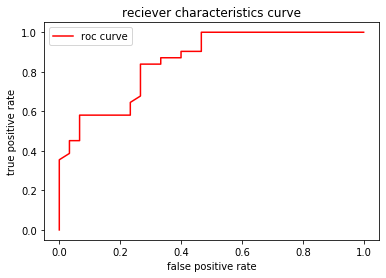

In [150]:
# plot an roc curve for better understanding 

def plot_roc_curve(fpr,tpr):
    """
    Plot roc curve given false positive rates and true positive rates 
    """
    # plot the curve 
    plt.plot(fpr,tpr,color = 'red', label="roc curve")
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("reciever characteristics curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [151]:
# check auc curve ie how much area is under the curve
from sklearn.metrics import average_precision_score  # auc score 
auc_score = average_precision_score(Y_test,preds_positive)
auc_score

0.8642262633201998

In [152]:
print(f"predicted percentage of area under curve:{auc_score*100:.2f}%")

predicted percentage of area under curve:86.42%


In [153]:
preds_proba[:10]

array([[0.84, 0.16],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.85, 0.15],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.32, 0.68],
       [0.99, 0.01],
       [0.11, 0.89]])

In [154]:
# check cross_val_score 

from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(clf, X, Y)
cross_val_score

array([0.81967213, 0.86885246, 0.73770492, 0.81666667, 0.75      ])

In [155]:
cross_val_mean = np.mean(cross_val_score)
cross_val_mean

0.7985792349726776

In [156]:
# check the score and compare with cross val score 

clf.score(X_test, Y_test), cross_val_mean

(0.7868852459016393, 0.7985792349726776)

### car_sales data set 

In [157]:
# get the car_sales dataset 

car_sales = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [158]:
car_sales.dropna(subset = ['Price'], inplace = True)

In [159]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [160]:
len(car_sales)

950

In [161]:
# check missing values 

car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [162]:
# split into X features and Y labels 

X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

In [163]:
# remove missing values with sklearn imputer 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
num_imputer = SimpleImputer(strategy = "mean")
doors_imputer = SimpleImputer(strategy = "constant", fill_value = 4.0)

cat_features = ["Make","Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)])

X_transformed = transformer.fit_transform(X)
X_transformed

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [164]:
car_sales_filled = pd.DataFrame(X_transformed, columns = ["Make","Colour","Odometer (KM)","Doors"])
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,missing,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [165]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [166]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [167]:
# convert all columns to numeric 

car_sales_filled["Odometer (KM)"] = car_sales_filled["Odometer (KM)"].astype(int)
car_sales_filled["Doors"] = car_sales_filled["Doors"].astype(int)

In [168]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)     int32
Doors             int32
dtype: object

In [169]:
# now convert other columns to numeric with one hot encoder

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
One_Hot = OneHotEncoder()

transformer = ColumnTransformer([("One_Hot",One_Hot,categorical_features)],remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [170]:
# choose a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Split into train and test set 

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size = 0.2)

# fit the model

model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [171]:
# check the score 

accuracy_score = model.score(X_test,Y_test)
accuracy_score

0.17489419772460757

In [172]:
print(f"percentage of the regressor model is:{accuracy_score*100:.2f}%")

percentage of the regressor model is:17.49%


## Practise 25/08/2020

In [175]:
# import boston dataset 

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [177]:
# convert into dataframe 

boston_df = pd.DataFrame(boston["data"],columns=["feature names"])
boston_df["target"] = pd.Series(boston["target"])

ValueError: Shape of passed values is (506, 13), indices imply (506, 1)

In [179]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [180]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [203]:
# split the data into X features and Y labels 

X = boston_df.drop("target",axis = 1)
Y = boston_df["target"]

# choose a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# split the data into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model 

model.fit(X_train,Y_train)

# predict the model 

y_preds = clf.predict_proba(X_test)
y_preds
# check the score 

#model.score(X_test,Y_test)

array([[0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.56, 0.44],
       [0.54, 0.46],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.56, 0.44],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.71, 0.29],
       [0.5 , 0.5 ],
       [0.56, 0.44],
       [0.5 , 0.5 ],
       [0.52, 0.48],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.54, 0.46],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.52, 0.48],
       [0.54,

In [200]:
# mean absolute error 

from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(Y_test, y_preds)
mean_absolute_error

ValueError: y_true and y_pred have different number of output (1!=2)

In [198]:
df = pd.DataFrame(data={"Actual_model":Y_test,"predicted_model":y_preds})
df 

,Actual_model,predicted_model
283,50.0,0
207,22.5,0
156,13.1,0
212,22.4,0
363,16.8,0
...,...,...
352,18.6,0
160,27.0,0
317,19.8,0
214,23.7,0


## Practise - 31/08/2020

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2)

In [3]:
# import a heart disease data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# check any missing values 
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# check the data types
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [16]:
# split into X features and Y labels 

X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#split into train and test set 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model 
clf.fit(X_train,Y_train)

# predict the model 

preds = clf.predict(X_test)
preds

# predict the probabilities 

preds_proba = clf.predict_proba(X_test)
preds_proba[:10]


array([[0.45, 0.55],
       [0.74, 0.26],
       [0.04, 0.96],
       [0.48, 0.52],
       [0.95, 0.05],
       [0.14, 0.86],
       [0.49, 0.51],
       [0.13, 0.87],
       [0.96, 0.04],
       [0.04, 0.96]])

In [18]:
(preds[:10],preds_proba[:10])

(array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64),
 array([[0.45, 0.55],
        [0.74, 0.26],
        [0.04, 0.96],
        [0.48, 0.52],
        [0.95, 0.05],
        [0.14, 0.86],
        [0.49, 0.51],
        [0.13, 0.87],
        [0.96, 0.04],
        [0.04, 0.96]]))

In [32]:
preds_positive = preds_proba[:,1]
preds_positive[:10]

array([0.55, 0.26, 0.96, 0.52, 0.05, 0.86, 0.51, 0.87, 0.04, 0.96])

In [35]:
# plot the roc curve 
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(Y_test,preds_positive)
fpr[:10],tpr[:10],threshold[:10]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.        , 0.03225806, 0.12903226, 0.16129032, 0.29032258,
        0.32258065, 0.41935484, 0.48387097, 0.58064516, 0.64516129]),
 array([1.98, 0.98, 0.96, 0.93, 0.89, 0.88, 0.87, 0.85, 0.84, 0.82]))

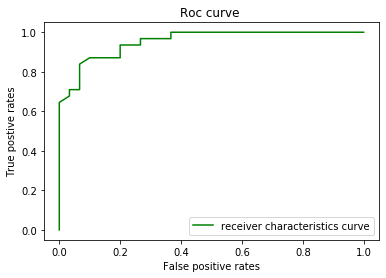

In [36]:
import matplotlib.pyplot as plt
#plot the roc curve for better understanding 

def roc_curve(fpr,tpr):
    """
    Plot the curve given false positive rates and true postive rates 
    """
    plt.plot(fpr,tpr,color="green",label="receiver characteristics curve")
    plt.xlabel("False positive rates")
    plt.ylabel("True postive rates")
    plt.title("Roc curve ")
    plt.legend()
    plt.show()
    
roc_curve(fpr,tpr)

In [40]:
# check how much area is covered under the curve 

from sklearn.metrics import average_precision_score
auc_score = average_precision_score(Y_test,preds_positive)
auc_score
print(f"The percentage of average precision score is:{auc_score*100:.2f}%")

The percentage of average precision score is:95.78%


In [43]:
# confusion matrix 

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test,preds)
conf_mat

array([[24,  6],
       [ 2, 29]], dtype=int64)

In [62]:
pd.crosstab(data={rownames="ActualMOdel",Y_test,colnames="PredictedModel",preds})

SyntaxError: invalid syntax (<ipython-input-62-cb382459986e>, line 1)

In [51]:
data={"ActualMOdel":Y_test,"PredictedModel":preds}

In [52]:
data

{'ActualMOdel': 299    0
 290    0
 142    1
 1      1
 262    0
       ..
 192    0
 10     1
 296    0
 92     1
 5      1
 Name: target, Length: 61, dtype: int64,
 'PredictedModel': array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)}

## Practise - 9/9/2020

**car sales data**

In [1]:
import pandas as pd 
import numpy as np 
np.random.seed(110)

In [5]:
# get the data 

car_sales = pd.read_csv("9.1 car-sales-extended-missing-data1.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [6]:
len(car_sales)

1000

In [7]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [10]:
# remove missing values 

car_sales.dropna(subset=["Price"],inplace=True)
len(car_sales)

950